In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/binay8/DataScienceProjects/master/lemonade/Lemonade.csv")

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/2017,Sunday,27.0,2.00,15.0,0.3,10
1,2/1/2017,Monday,28.9,1.33,15.0,0.3,13
2,3/1/2017,Tuesday,34.5,1.33,27.0,0.3,15
3,4/1/2017,Wednesday,44.1,1.05,28.0,0.3,17
4,5/1/2017,Thursday,42.4,NaN,NaN,NaN,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       363 non-null float64
Flyers         363 non-null float64
Price          363 non-null float64
Sales          365 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 20.1+ KB


In [5]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,363.000000,363.000000,363.000000,365.000000
mean,60.731233,0.824738,40.341598,0.334160,25.323288
std,16.196266,0.272485,13.190868,0.075371,6.893589
min,15.100000,0.470000,9.000000,0.300000,7.000000
25%,49.700000,0.650000,31.000000,0.300000,20.000000
50%,61.100000,0.740000,39.000000,0.300000,25.000000
75%,71.300000,0.910000,49.000000,0.300000,30.000000
max,102.900000,2.500000,80.000000,0.500000,43.000000


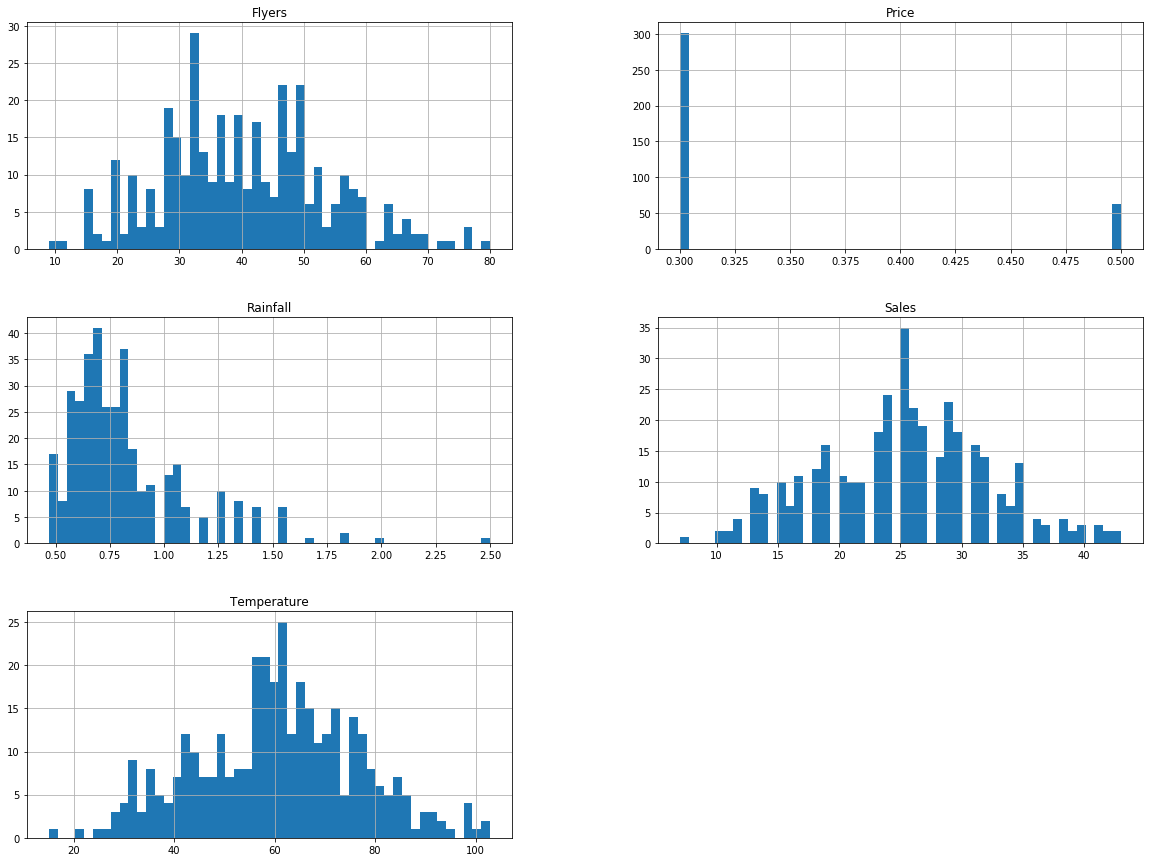

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize= (20,15))
plt.show()

In [7]:
corr_matrix = df.corr()
corr_matrix['Sales'].sort_values(ascending= False)

Sales          1.000000
Temperature    0.989832
Flyers         0.804714
Price          0.512535
Rainfall      -0.908558
Name: Sales, dtype: float64

<h1> Analysing using Random sampling </h1>

In [8]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [9]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
print(len(train_set))
print(len(test_set))

292
73


In [10]:
train_df = train_set.copy()

In [11]:
corr_matrix = train_df.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales          1.000000
Temperature    0.989324
Flyers         0.797050
Price          0.508216
Rainfall      -0.907094
Name: Sales, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214D039AA48>,
      dtype=object)

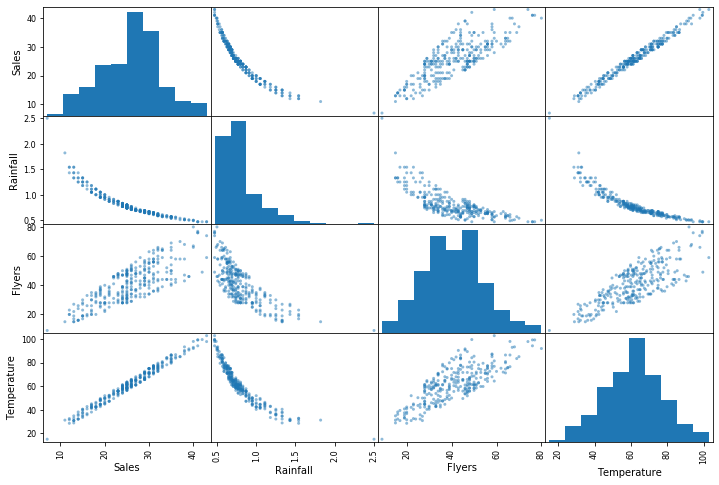

In [12]:
from pandas.plotting import scatter_matrix

attributes =  ["Sales",
             "Rainfall",
             "Flyers",
             "Temperature"]
scatter_matrix(train_set[attributes], figsize= (12,8))


In [13]:
train_df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,292.000000,290.000000,290.000000,290.000000,292.000000
mean,61.793151,0.803966,41.110345,0.334483,25.760274
std,15.834041,0.254067,13.200145,0.075679,6.786184
min,15.100000,0.470000,9.000000,0.300000,7.000000
25%,51.750000,0.650000,32.000000,0.300000,21.000000
50%,61.500000,0.740000,41.000000,0.300000,26.000000
75%,72.075000,0.870000,49.000000,0.300000,30.000000
max,102.900000,2.500000,80.000000,0.500000,43.000000


In [14]:
train_df_labels = train_set['Sales'].copy() # extract labels from the training set
train_df = train_set.drop('Sales', axis = 1) # remove labels for training set


In [15]:
print(train_df.columns)

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price'], dtype='object')


In [16]:
train_df_incomplete = train_df[train_df.isnull().any(axis=1)]
train_df_incomplete

,Date,Day,Temperature,Rainfall,Flyers,Price
28,29/01/2017,Sunday,35.2,NaN,NaN,NaN
4,5/1/2017,Thursday,42.4,NaN,NaN,NaN


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [18]:
train_df_num = train_df.drop(["Date", "Day"], axis = 1)

In [19]:
imputer.fit(train_df_num)
X= imputer.transform(train_df_num)
train_df_num_tr = pd.DataFrame(X, columns=train_df_num.columns,
                              index= train_df_num.index)


In [20]:
print("Median using imputer:" , imputer.statistics_)
print("Median Calculated:",train_df_num.median().values)
print('\nBoth should match')

Median using imputer: [61.5   0.74 41.    0.3 ]
Median Calculated: [61.5   0.74 41.    0.3 ]

Both should match


In [21]:
train_df_num_tr.loc[train_df_incomplete.index.values]

,Temperature,Rainfall,Flyers,Price
28,35.2,0.74,41.0,0.3
4,42.4,0.74,41.0,0.3


In [22]:
train_df_cat = train_df[['Day']]
train_df_cat["Day"].unique()

array(['Monday', 'Thursday', 'Saturday', 'Friday', 'Sunday', 'Wednesday',
       'Tuesday'], dtype=object)

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_df_cat_encoded = ordinal_encoder.fit_transform(train_df_cat)
ordinal_encoder.categories_


[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object)]

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Option 1
hot_encoder = OneHotEncoder()
train_df_cat_1hot = hot_encoder.fit_transform(train_df_cat)
# train_df_cat_1hot.toarray()

# Option 2
hot_encoder = OneHotEncoder(sparse= False)
train_df_cat_1hot = hot_encoder.fit_transform(train_df_cat)
train_df_cat_1hot


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [25]:
print(hot_encoder.categories_)


[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)]


Follwing block of code is to create custom/calculated columns as needed

In [26]:
""" Leave Blank """


' Leave Blank '

In [27]:
train_df_num_tr.head()

,Temperature,Rainfall,Flyers,Price
211,74.6,0.61,38.0,0.5
340,42.1,1.05,26.0,0.3
202,99.6,0.47,49.0,0.5
75,56.5,0.77,50.0,0.3
84,59.5,0.77,39.0,0.3


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

train_df_num_tr = num_pipeline.fit_transform(train_df_num)
pd.DataFrame(train_df_num_tr, columns= train_df_num.columns, index= train_df_num.index).head()

,Temperature,Rainfall,Flyers,Price
211,0.810206,-0.765495,-0.236792,2.200000
340,-1.245857,0.974919,-1.150579,-0.454545
202,2.391793,-1.319263,0.600846,2.200000
75,-0.334863,-0.132617,0.676995,-0.454545
84,-0.145073,-0.132617,-0.160643,-0.454545


In [29]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_df_num)
cat_attribs = list(train_df_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

train_df_prepared = full_pipeline.fit_transform(train_df)

In [30]:
train_df_prepared.shape

(292, 11)

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_df_prepared, train_df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
some_data = train_df.iloc[:5]
some_labels = train_df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:" , list(some_labels) )

Predictions: [31.30778263 17.58173334 41.01163619 23.88401344 24.94532127]
Labels: [32, 17, 42, 25, 25]


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np
sales_predictions = lin_reg.predict(train_df_prepared)
lin_mse = mean_squared_error(train_df_labels, sales_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.9311506284042469

In [34]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_df_labels, sales_predictions)
lin_mae

0.8044546973832531

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_regression = DecisionTreeRegressor(random_state=42)
tree_regression.fit(train_df_prepared, train_df_labels)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [36]:
print("Predictions:", tree_regression.predict(some_data_prepared))
print("Labels:" , list(some_labels) )
sales_predictions_tree = tree_regression.predict(train_df_prepared)
tree_rmse=np.sqrt(mean_squared_error(train_df_labels, sales_predictions_tree)) 
print("RMSE:", tree_rmse)

Predictions: [32. 17. 42. 25. 25.]
Labels: [32, 17, 42, 25, 25]
RMSE: 0.0


In [37]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_regression, train_df_prepared, train_df_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [38]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print("Decision Tree Model scores")
display_scores(tree_rmse_scores)

Decision Tree Model scores
Scores: [0.93094934 1.         0.89056356 1.0667385  1.01709526 1.15966702
 1.29986737 1.15966702 0.7878386  1.71202643]
Mean: 1.1024413072260608
Standard deviation: 0.24687041783525573


In [39]:
lin_scores = cross_val_score(lin_reg, train_df_prepared, train_df_labels, scoring= "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("Linear Regression Model Scores")
display_scores(lin_rmse_scores)

Linear Regression Model Scores
Scores: [0.94300263 0.8208467  0.87608636 0.99935624 1.0189525  0.96607011
 0.96544874 0.92240143 1.06748155 1.20457596]
Mean: 0.9784222226143846
Standard deviation: 0.10058551019537561


In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_regression = RandomForestRegressor(n_estimators=10, random_state=42)
forest_regression.fit(train_df_prepared, train_df_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [41]:
print("Predictions on Some Data:", tree_regression.predict(some_data_prepared))
print("Labels on Some Data:" , list(some_labels) )
sales_predictions_forest =forest_regression.predict(train_df_prepared)
forest_rmse=np.sqrt(mean_squared_error(train_df_labels, sales_predictions_forest)) 
print("RMSE:", forest_rmse)

Predictions on Some Data: [32. 17. 42. 25. 25.]
Labels on Some Data: [32, 17, 42, 25, 25]
RMSE: 0.38463645885361947


In [42]:
forest_scores = cross_val_score(forest_regression, train_df_prepared, train_df_labels, scoring= "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Random Forest Model Scores")
display_scores(forest_rmse_scores)

Random Forest Model Scores
Scores: [0.70663522 0.78166489 0.76519098 0.68254089 0.81409988 1.07173723
 0.8570197  0.94577099 0.79611124 1.49896516]
Mean: 0.8919736178463007
Standard deviation: 0.2294728256457835
